In [1]:
from demo import Spotify, Recommender
from demo.lib import DB
from demo.displays import Demo1

## 1. Intro

In [2]:
db = DB()

search_sp = Spotify()
search_sp.search()

mailbox_id = db.save_mailbox(search_sp.sel_tracks)

Demo1.pt1(mailbox_id, search_sp)
search_sp.sel_tracks.head()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


### 우체통 <u>'6298ae6e3dd9b24d01a45dbc'</u>이 등록되었습니다.

**총 <u>5개</u>의 Seed음악이 들어있습니다.**

,trackId,trackName,artistIds,artistNames,image
0,5xrtzzzikpG3BLbo4q1Yul,LILAC,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2734ed058...
1,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b27382ecc5...
2,4LYlWqZSPaLMk9FthWF0To,Memorize Our Night,7c1HgFDe8ogy5NOZ1ANCJQ,"Car, the garden",https://i.scdn.co/image/ab67616d0000b27383fc7e...
3,4Nd7PP3Qnuwjb72dNkbE2f,"아마두 (feat. 우원재, 김효은, 넉살 & 허클베리피)",0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b27363ee23...
4,7tIOwGFRTM08JdAeKOELGp,Blue room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,https://i.scdn.co/image/ab67616d0000b273e844e3...


## 2. Recommender Init

In [3]:
recommender = Recommender(mailbox_id)
recommender.init_setting()

Demo1.pt2(recommender)
recommender.reco['tracks'].head()

### 우체통 <u>'6298ae6e3dd9b24d01a45dbc'</u>의 음악들의 <u>Spoitfy 추천 음악은 총 466 개</u> 입니다.

,trackId,trackName,artistIds,artistNames,image,seedId
0,6t2ubAB4iSYOuIpRAOGd4t,Cake - Challenge Version,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273b765af...,5xrtzzzikpG3BLbo4q1Yul
1,3b5Li4QKDVBx1x7fQuu54a,Tired,"7vk5e3vY1uw9plTHJAMwjN,25tMQOrIU4LlUo6Sv8v5SE","Alan Walker,Gavin James",https://i.scdn.co/image/ab67616d0000b273c31161...,5xrtzzzikpG3BLbo4q1Yul
2,0BBUGRUURDjwcXmDS3kQkN,Atlantis,2hRQKC0gqlZGPrmUKbcchR,SHINee,https://i.scdn.co/image/ab67616d0000b273e71098...,5xrtzzzikpG3BLbo4q1Yul
3,2eAAEa8pxKF7My0EO4rFgR,Blow Your Mind (Mwah),6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,https://i.scdn.co/image/ab67616d0000b2736b915e...,5xrtzzzikpG3BLbo4q1Yul
4,3NLnwwAQbbFKcEcV8hDItk,Perfect,4AK6F7OLvEQ5QYCBNiQWHq,One Direction,https://i.scdn.co/image/ab67616d0000b273241e4f...,5xrtzzzikpG3BLbo4q1Yul


## 3. Recommend Process

### 데이터 병합

**Seed음악과 추천음악의 병합이 완료되었습니다. 총 <u>471개의 음악</u>들로 구성되어 있습니다.**

                  trackId  acousticness  danceability  energy  \
0  5xrtzzzikpG3BLbo4q1Yul        0.0895         0.738  0.8900   
1  2PcJoVkfjcbvoqBxV1Nj7y        0.2450         0.613  0.6680   
2  4LYlWqZSPaLMk9FthWF0To        0.4690         0.396  0.2960   
3  4Nd7PP3Qnuwjb72dNkbE2f        0.1790         0.782  0.5920   
4  7tIOwGFRTM08JdAeKOELGp        0.9890         0.632  0.0378   

   instrumentalness  key  liveness  loudness  speechiness    tempo  valence  
0          0.000002    2    0.2130    -2.275       0.0748  114.942    0.750  
1          0.000000    8    0.0735    -6.867       0.2670   96.176    0.509  
2          0.000000    0    0.2090    -6.789       0.0296  127.056    0.172  
3          0.000000    7    0.0822    -7.264       0.3810  149.694    0.581  
4          0.935000    5    0.1120   -20.596       0.0583  121.361    0.357  


### 데이터 전처리

**데이터셋의 Min-Max Normalization 작업이 완료되었습니다.**

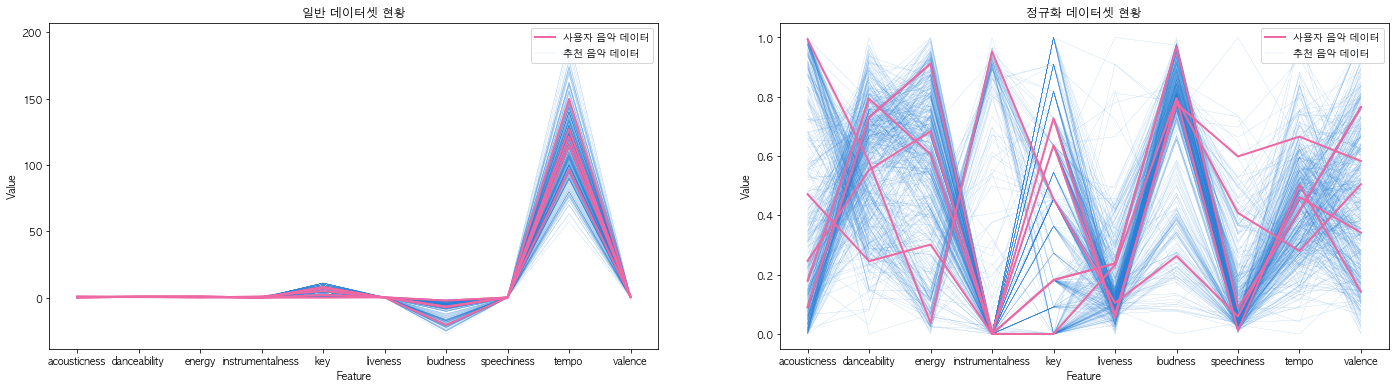

### KMeans Clustering Fitting

**클러스터링 작업이 완료되었습니다.**

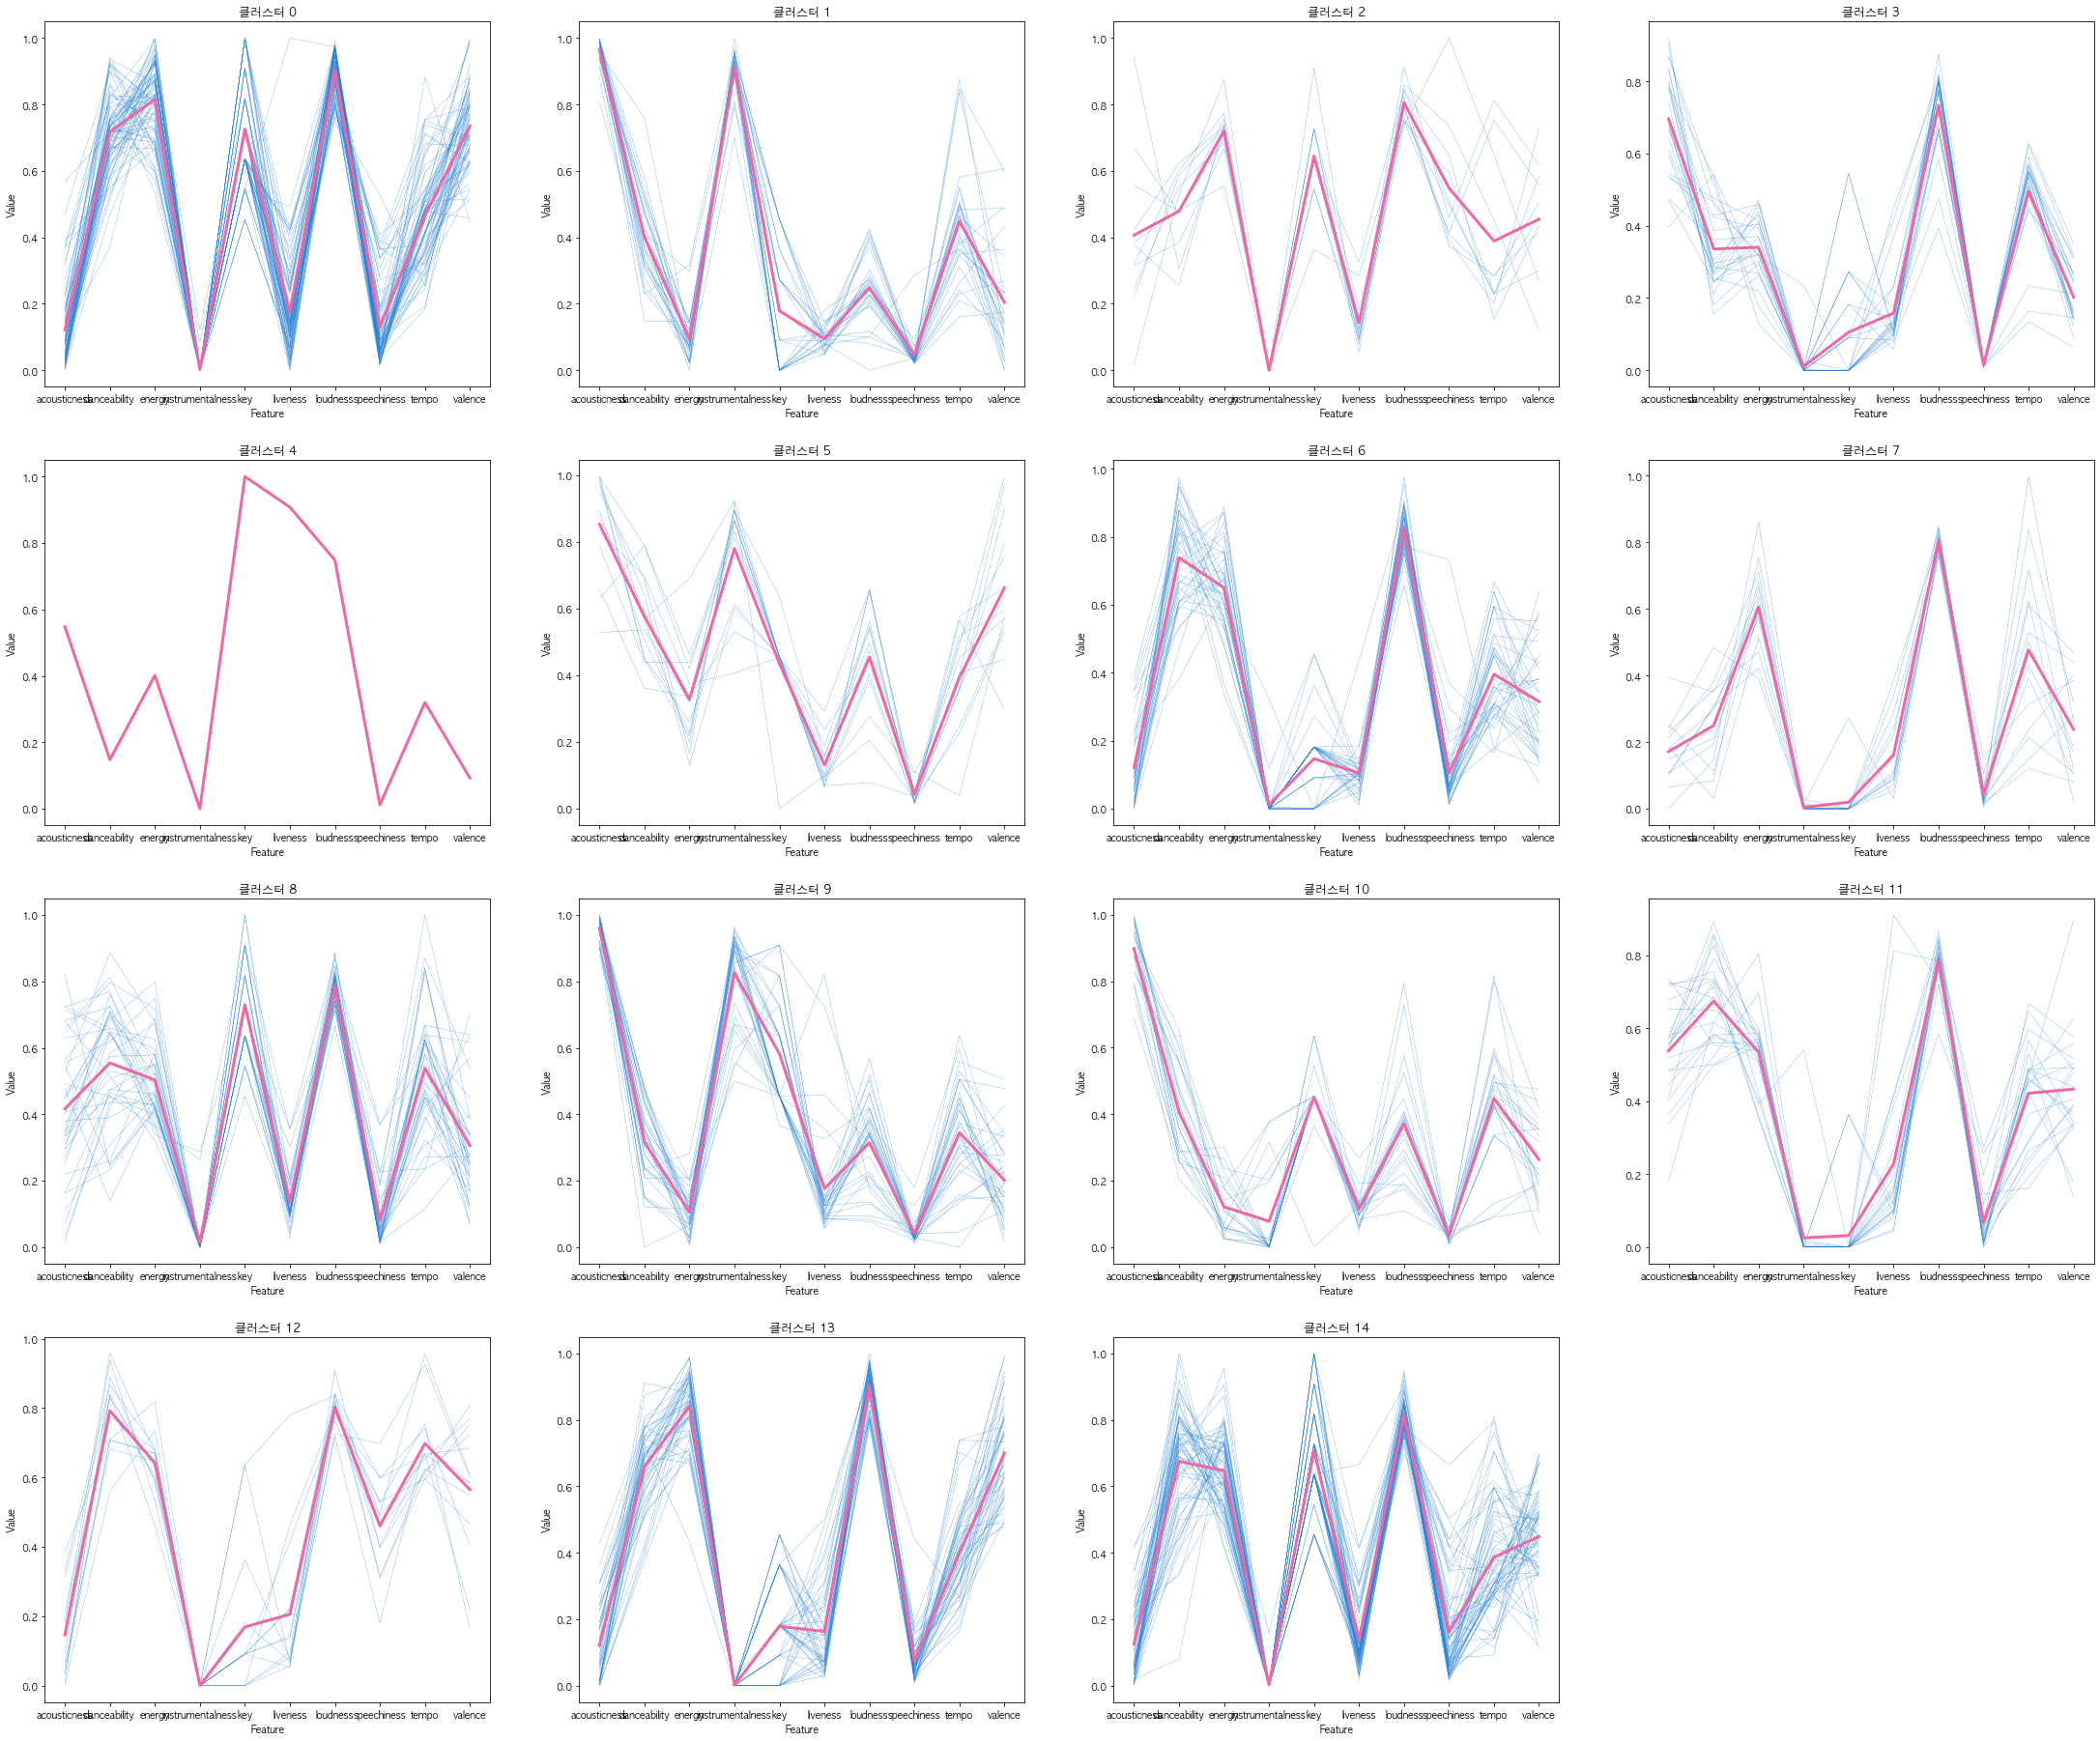

### KMeans Clustering Parsing

**우체통 <u>'6298ae6e3dd9b24d01a45dbc'</u>의 음악들은 <u>클러스터[ 1  2  3 12 13]번</u>에 속해 있습니다.**

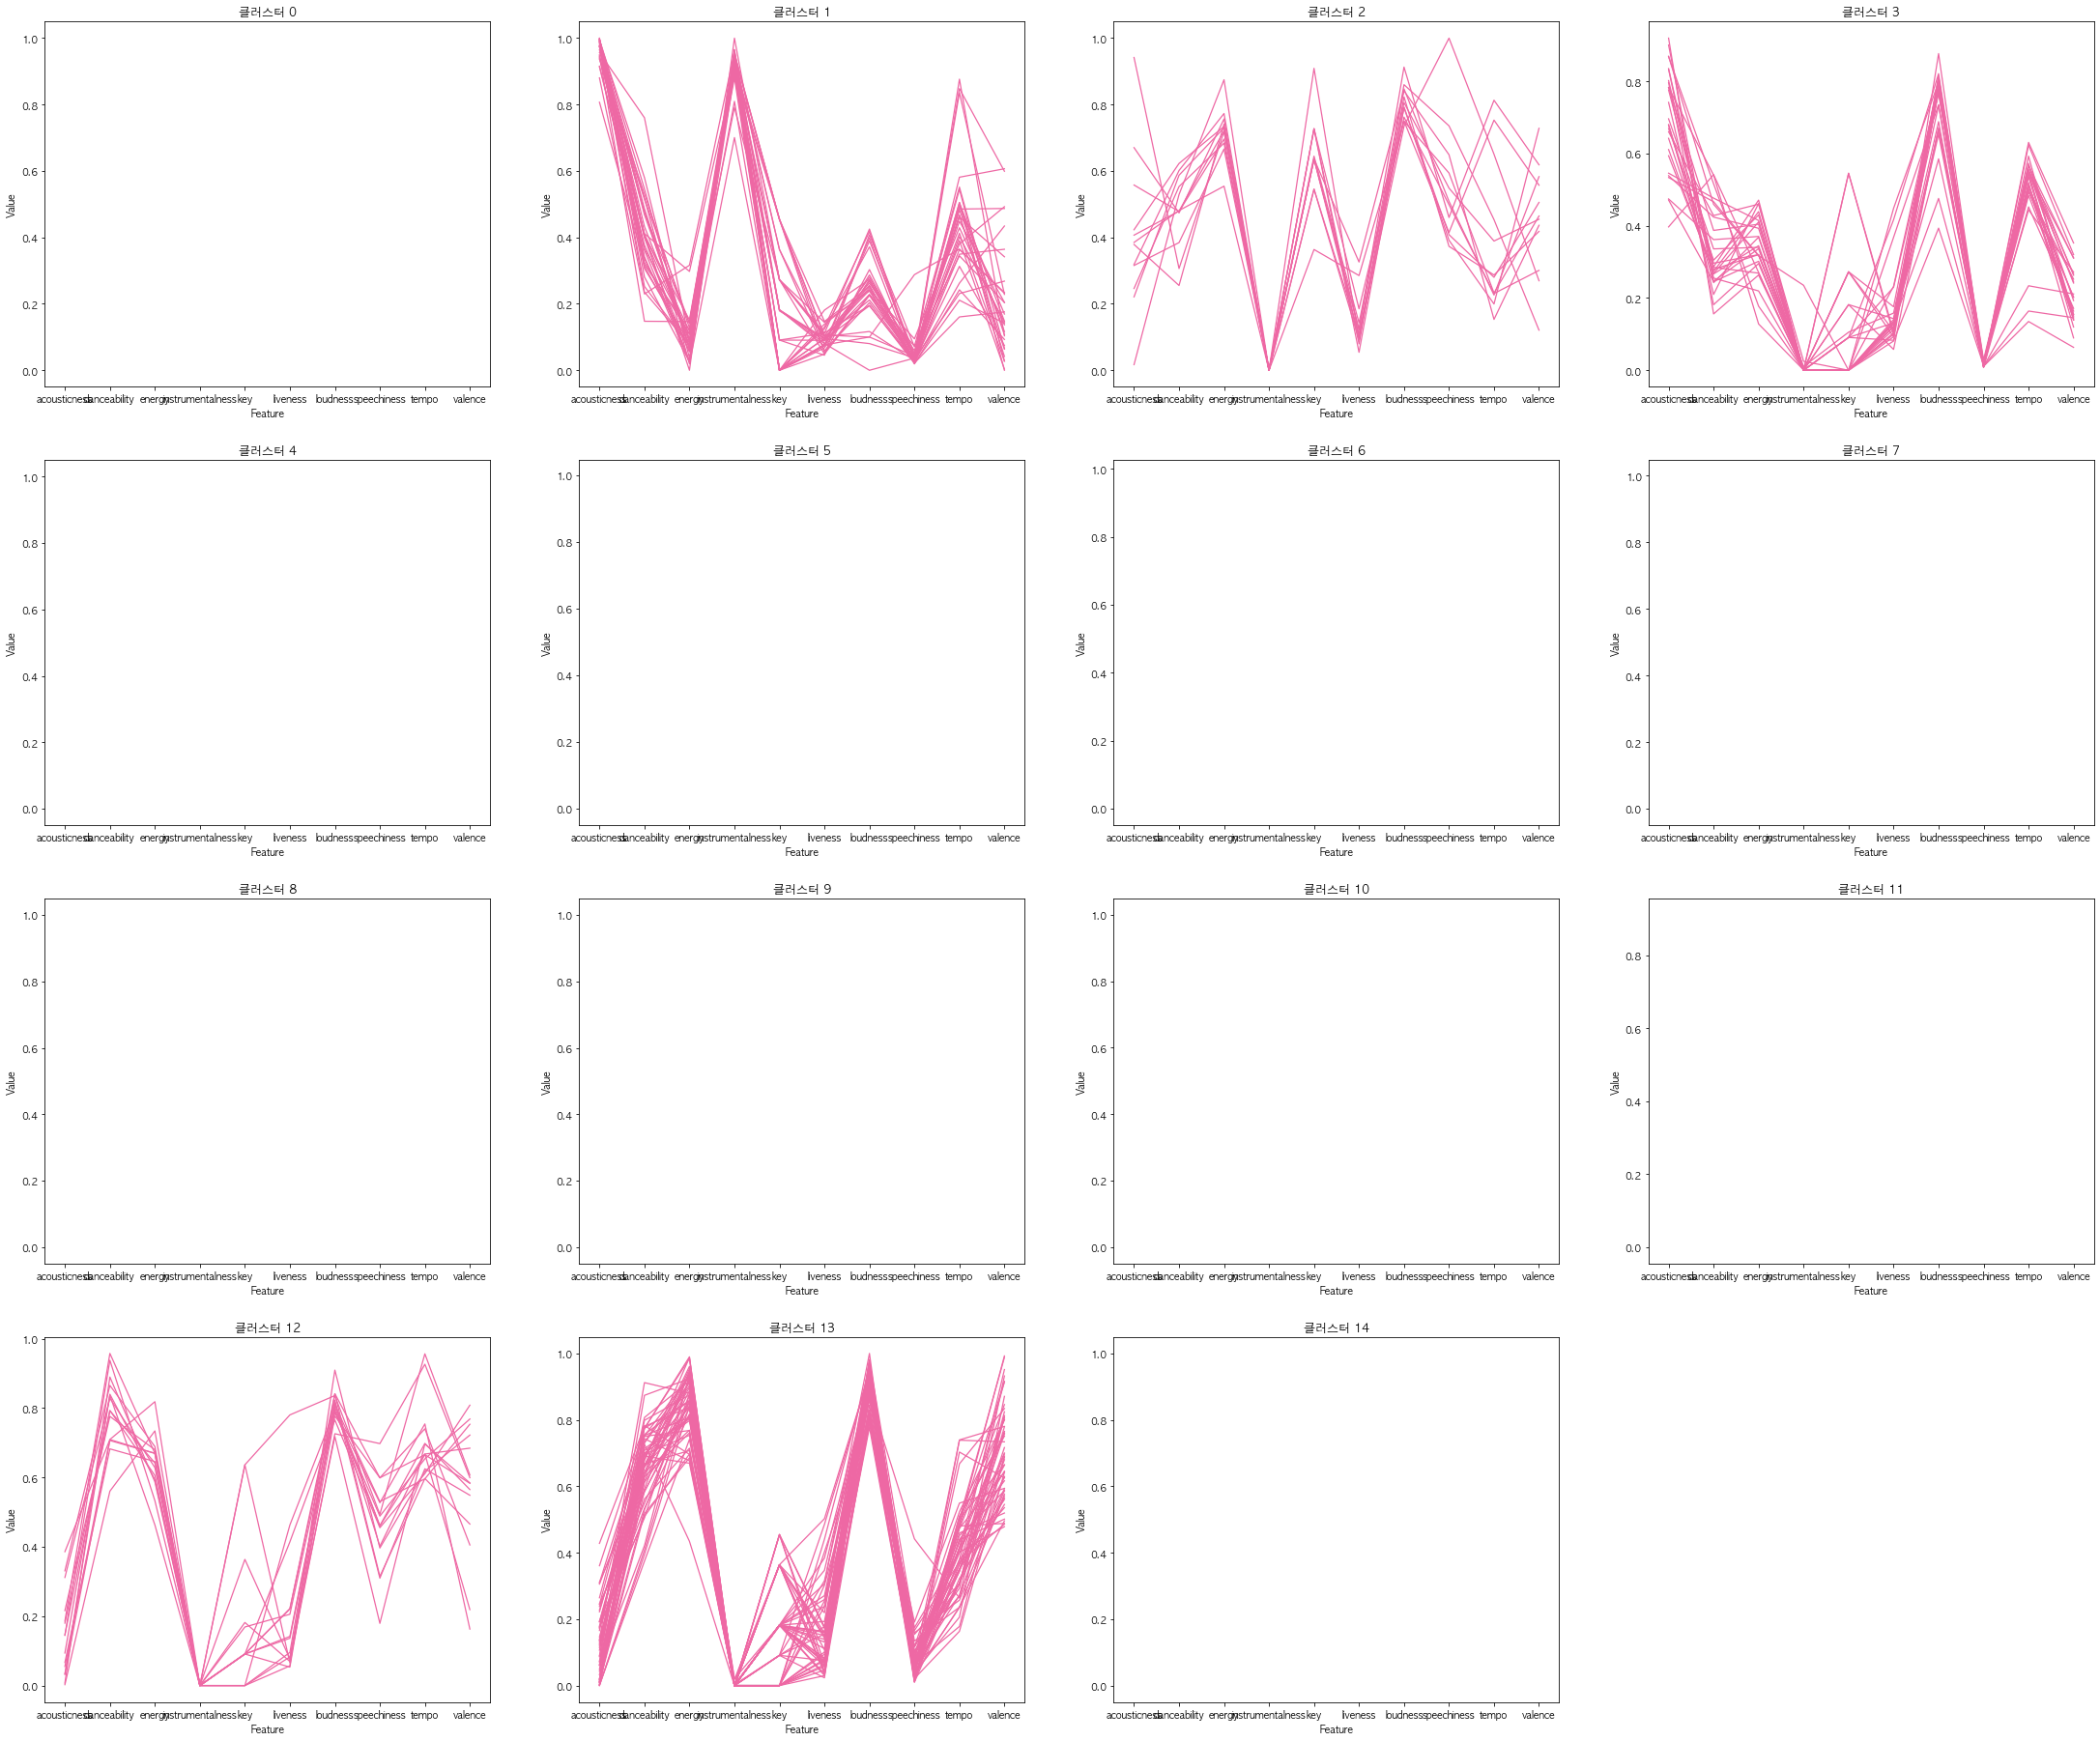

**우체통 <u>'6298ae6e3dd9b24d01a45dbc'</u>를 위한 총 <u>128개의 추천음악</u>이 선정 되었습니다.**

### Rate Adjusting

**추천음악 수량이 <u>128개</u>에서 <u>100개</u>로 조정되었습니다.**

<b>추천음악 수량 표준편차 변화 : <u>11 → 5</u></b>

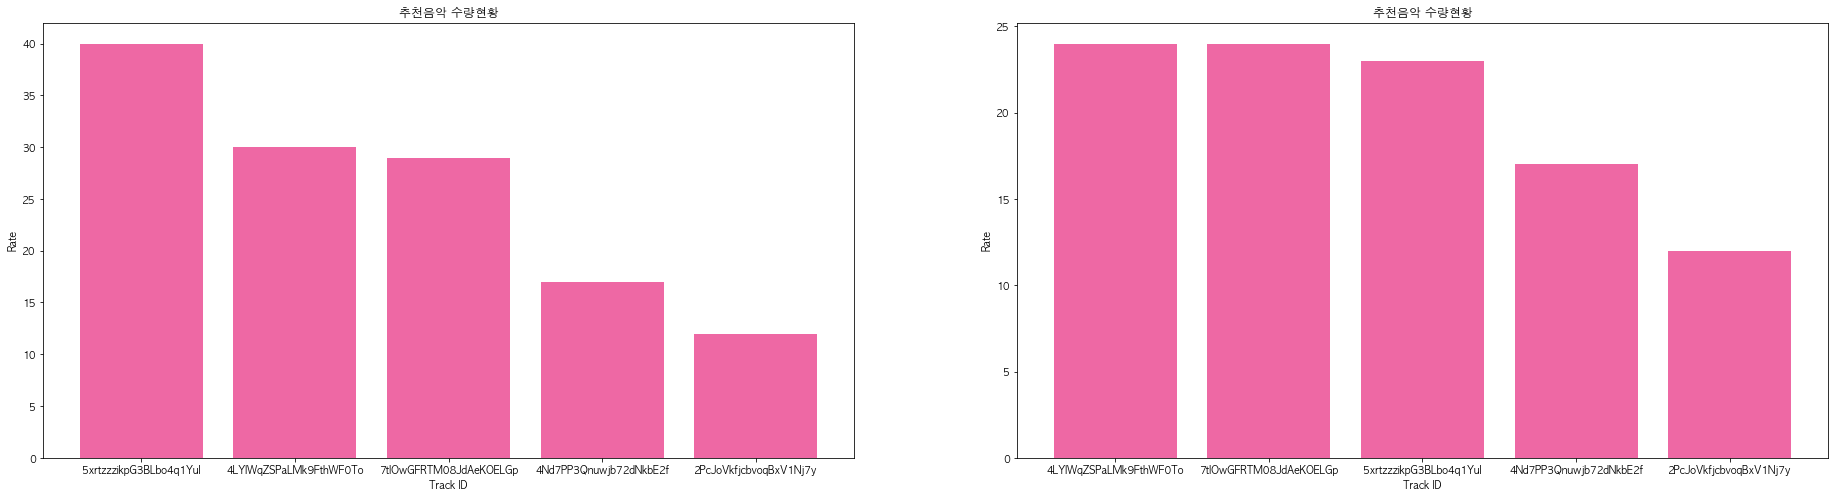

### <u>우체통 6298ae6e3dd9b24d01a45dbc를 위한</u> 음악 <u>100개</u>가 준비 되었습니다.

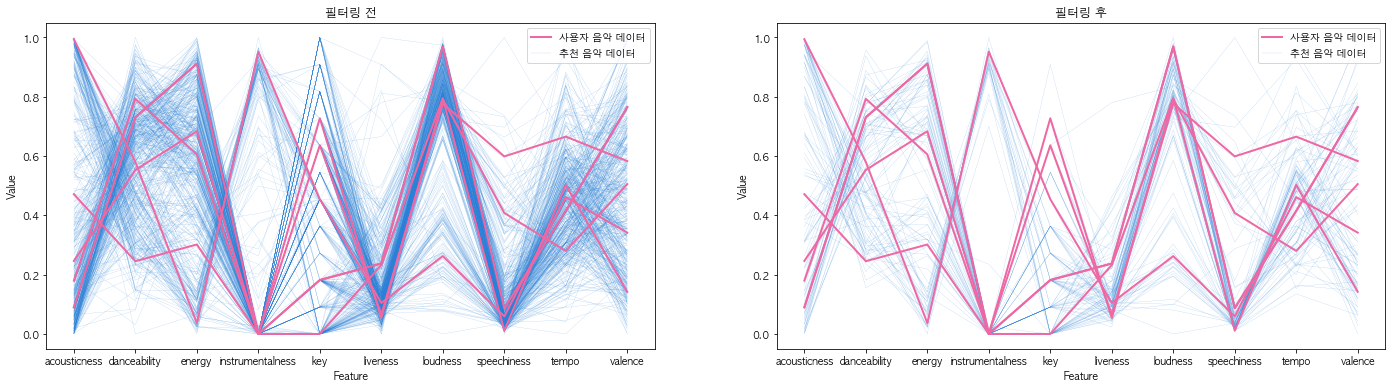

,trackId,trackName,artistIds,artistNames,image,seedId
0,6t2ubAB4iSYOuIpRAOGd4t,Cake - Challenge Version,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273b765af...,5xrtzzzikpG3BLbo4q1Yul
1,3b5Li4QKDVBx1x7fQuu54a,Tired,"7vk5e3vY1uw9plTHJAMwjN,25tMQOrIU4LlUo6Sv8v5SE","Alan Walker,Gavin James",https://i.scdn.co/image/ab67616d0000b273c31161...,5xrtzzzikpG3BLbo4q1Yul
2,1dyMRzKZMakJqmOnsUUZ9X,Hot Summer,3wRA5UYoo08BBKJnzyKkpF,f(x),https://i.scdn.co/image/ab67616d0000b273f968b1...,5xrtzzzikpG3BLbo4q1Yul
3,4fZYGHiRcKxwVSnF498uaE,Nillili Mambo,4RnezwRV7VBJUCI1S0AE5u,Block B,https://i.scdn.co/image/ab67616d0000b273a22e31...,5xrtzzzikpG3BLbo4q1Yul
4,0emCVoP02QWnj1dOhNn20Y,"깊은 밤을 날아서 (Flying, deep in the night)",0il5ZP3xYOECtONJtZ38Ln,KYUHYUN,https://i.scdn.co/image/ab67616d0000b2730b98d6...,5xrtzzzikpG3BLbo4q1Yul


In [4]:
Demo1.pt3(recommender)
recommender.reco_['tracks'].head()

## 4. Outro

In [5]:
mail_id = db.save_mail(recommender)
Demo1.pt4(recommender, mail_id)

### 우체통 <u>6298ae6e3dd9b24d01a45dbc</u>를 위한 음악편지 <u>6298aec83dd9b24d01a45dbf</u>를 넣어놨어요.